In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from TCGA_files import *

In [2]:
directory = '/Users/filippo/Developer/tesi/results/hSBM/overlap_1000doc_0.5occ_thr/topsbm'

In [3]:
l=0

In [4]:
df = pd.read_csv("%s/topsbm_level_%d_topic-dist.csv"%(directory,l))

In [5]:
df.head()

,i_doc,doc,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,...,Topic 39,Topic 40,Topic 41,Topic 42,Topic 43,Topic 44,Topic 45,Topic 46,Topic 47,Topic 48
0,0,007f49fe-d251-4ae4-9313-86d765b13499,0.209302,0.023256,0.023256,0.093023,0.046512,0.279070,0.023256,0.046512,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,009ff7e3-8bd3-4683-adf5-7b68a0859f35,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,00e2c524-8a29-46d7-bf88-ed5f9c3dcf32,0.066667,0.033333,0.000000,0.033333,0.066667,0.033333,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,00eb7c26-84fd-4ab9-93a1-3d209dfc0f43,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,01188815-3676-4980-9cb8-7666169328f1,0.069767,0.000000,0.000000,0.000000,0.000000,0.023256,0.000000,0.023256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
topic = 11

In [59]:
searchdf = df.sort_values(by="Topic %d"%topic, ascending=False).loc[:,['doc','Topic %d'%topic]]
searchdf.head()

,doc,Topic 11
853,df2df36d-6652-4eec-b62a-ea99af075cb6,0.736842
763,c6e85461-d986-46c3-b6b8-ab56d97320a3,0.709677
503,7d03109b-45bd-4f4c-836a-78d59e38fe4a,0.705882
267,42e6517c-02ff-491b-8315-9ef163e6cfdc,0.653846
316,4e7e76ad-0f1d-4322-a749-a483a810dba5,0.631579


In [60]:
datatotest = queryFiles([f[0]+'.FPKM.txt.gz' for f in searchdf.values[:10] if f[1]>0.1])

quering...df2df36d-6652-4eec-b62a-ea99af075cb6.FPKM.txt.gz
quering...c6e85461-d986-46c3-b6b8-ab56d97320a3.FPKM.txt.gz
quering...7d03109b-45bd-4f4c-836a-78d59e38fe4a.FPKM.txt.gz
quering...42e6517c-02ff-491b-8315-9ef163e6cfdc.FPKM.txt.gz
quering...4e7e76ad-0f1d-4322-a749-a483a810dba5.FPKM.txt.gz
quering...171f6436-748a-4072-9ef6-e90d8cd9b465.FPKM.txt.gz
quering...b49d2b1e-310f-4278-a7c2-5ea95c2c7c43.FPKM.txt.gz
quering...799199d9-0ff7-4d58-97bd-08009f64947d.FPKM.txt.gz
quering...3abbd2b5-04db-4fe0-8dd1-ea2b48caa4c1.FPKM.txt.gz
quering...fd0eaf98-847d-499b-bfc0-95e84f5b15d0.FPKM.txt.gz


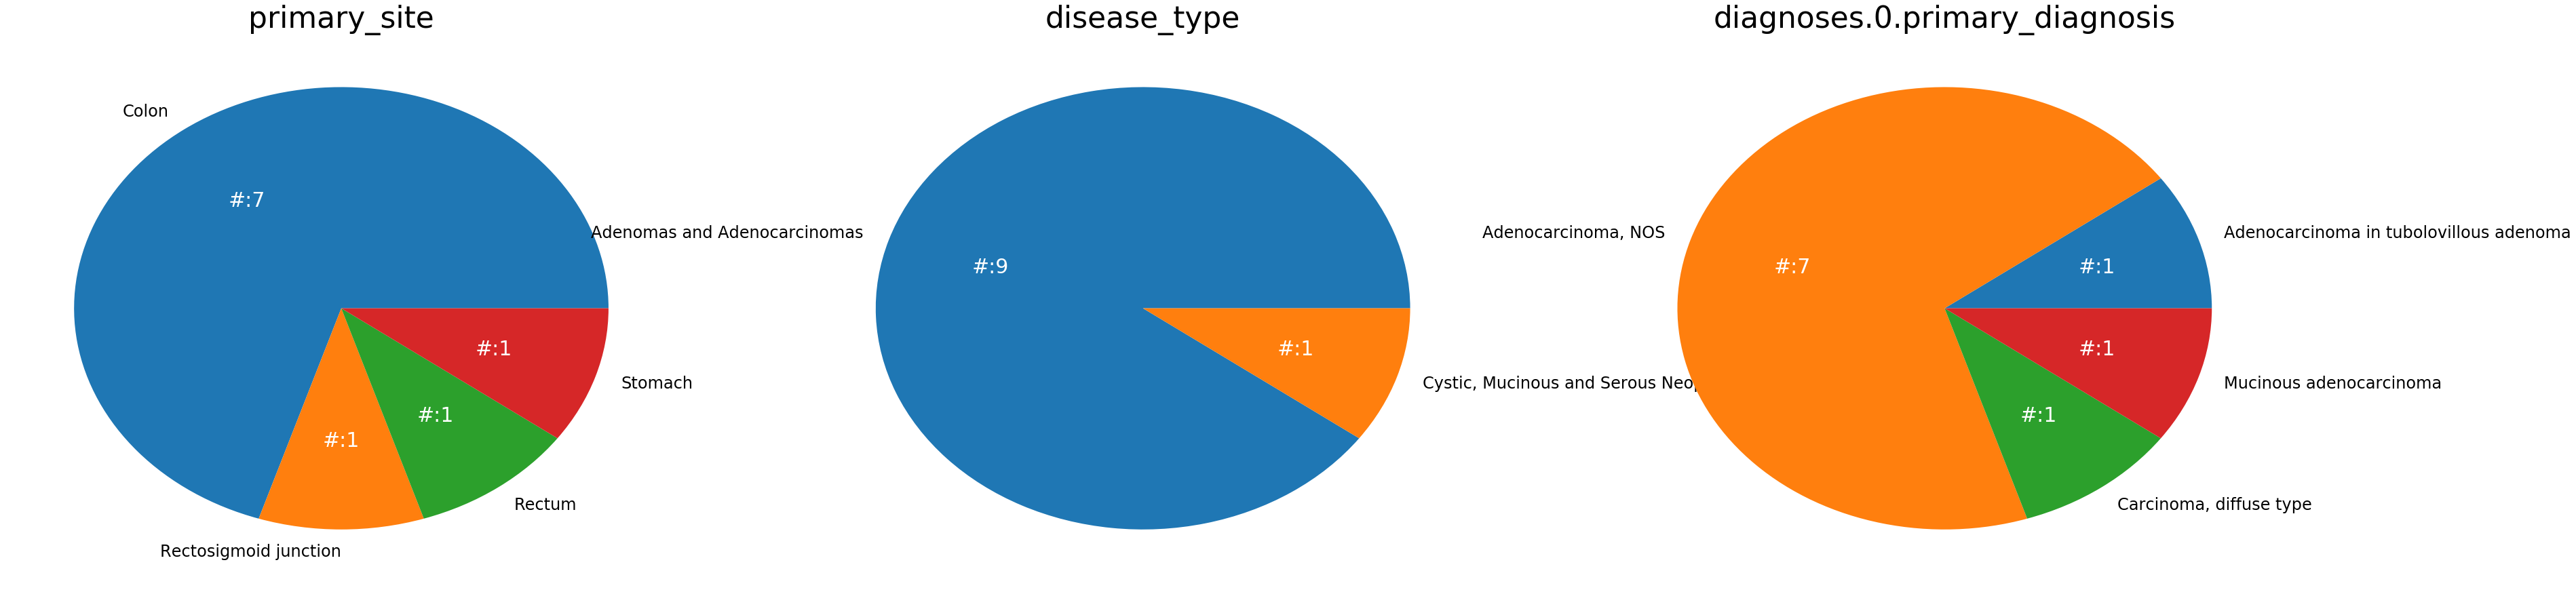

In [61]:
makeTopicPie(datatotest, l, ['primary_site','disease_type','diagnoses.0.primary_diagnosis'])

## topic distr

In [32]:
def topic_distr_sample(doc, ax=None):
    if ax == None:
        fig = plt.figure()
        ax = fig.subplots()
    ax.set_title("Topic distribution: %s"%doc)
    labels=[l if df[df['doc']==doc].loc[:,l].values[0]>=0.05 else '' for l in df.columns[2:]]
    patches, texts, autotexts = ax.pie(df[df['doc']==doc].values[0][2:], labels=labels, autopct=lambda(p): '%.1f%s'%(p,'%') if p >= 5 else '', textprops={'fontsize':20, 'color':'white', 'wrap':True})
    for t in texts:
                t.set_fontsize(18)
                t.set_wrap(True)
                t.set_color('black')
    plt.show()
    
def topic_distr_isample(idoc, ax=None):
    topic_distr_sample(df[df['i_doc']==idoc]['doc'].values[0],ax)

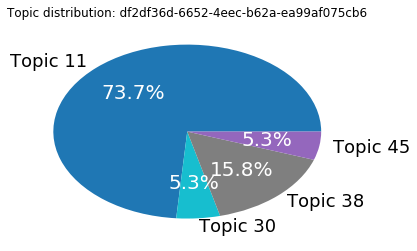

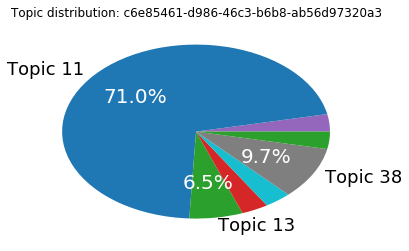

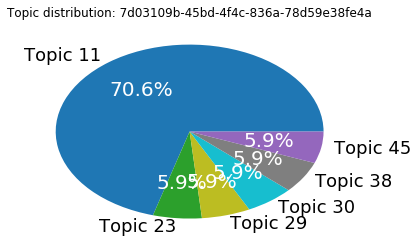

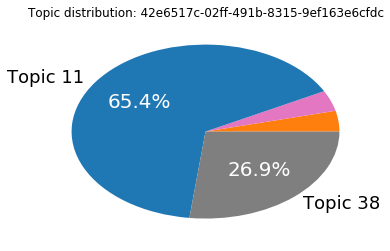

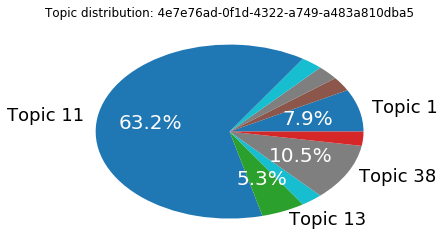

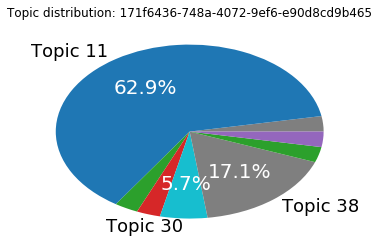

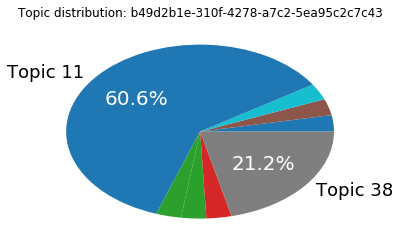

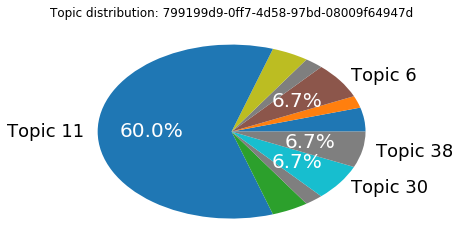

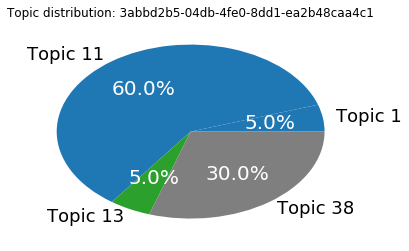

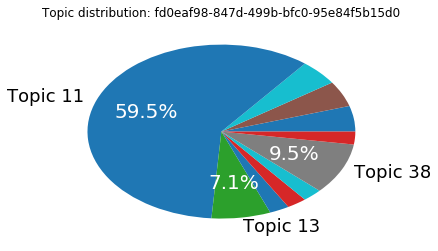

In [62]:
for idoc in searchdf.index.values[:10]:
    fig=plt.figure()
    ax=fig.subplots()
    topic_distr_isample(idoc,ax)
    plt.show()
    fig.savefig("topic_distr_%d.png"%idoc)